In [1]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D
from keras.layers import Dropout, Input, Softmax, RandomFlip
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.utils import image_dataset_from_directory

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_rows = 200
img_cols = 200
channels = 3

def load_dataset(path):
    dataset = image_dataset_from_directory(directory = path, 
                                           label_mode = 'categorical', 
                                           color_mode = 'rgb', 
                                           shuffle = False, 
                                           batch_size = None,
                                           image_size = (img_rows, img_cols),
                                           crop_to_aspect_ratio = True)
    return dataset

dataset1 = load_dataset('/content/drive/MyDrive/Deep Learning Class/Brain/Training')
dataset2 = load_dataset('/content/drive/MyDrive/Deep Learning Class/Brain/Testing')

images = []
labels = []
for (image, label) in dataset1:
    images.append(image)
    labels.append(label)

for (image, label) in dataset2:
    images.append(image)
    labels.append(label)
    
images = np.asarray(images)
labels = np.asarray(labels)
labels = labels.astype(np.uint8)

images, labels = shuffle(images, labels, random_state = 10)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 36)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


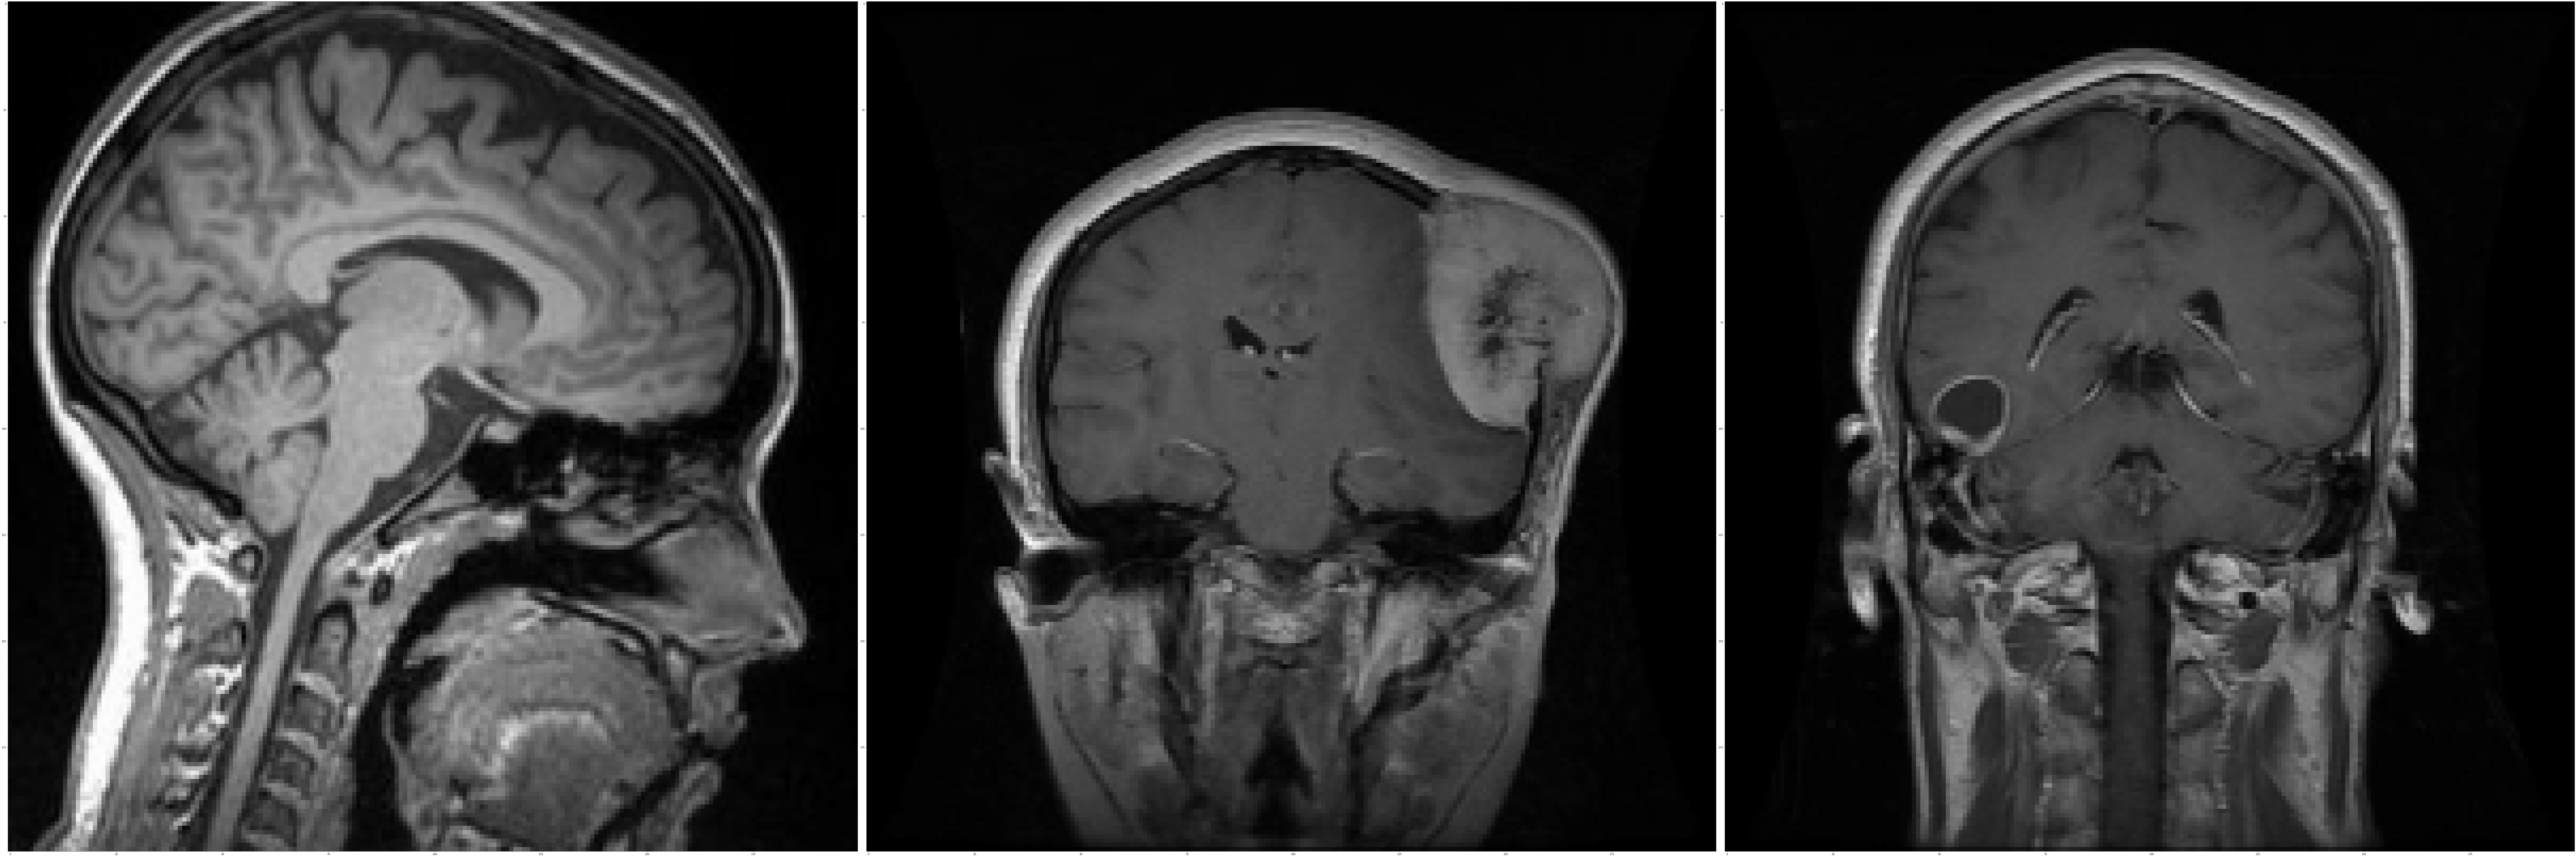

In [3]:
plt.figure(figsize = (50 * 3, 50))

for i in range(3):
    image = x_train[i].astype(np.uint8)
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [4]:
def create_model(dropout_rate = 0.5, flip_mode = None, lr = 0.001):
    model = Sequential()
    model.add(Input(shape = (img_rows, img_cols, channels)))
    if(flip_mode != None):
        model.add(RandomFlip(flip_mode))

    model.add(EfficientNetB0(weights = 'imagenet', include_top = False))

    model.add(GlobalAveragePooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation = 'softmax'))

    model.build()
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [5]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, 
                              min_delta = 0.01, mode = 'auto', verbose = 1)

In [8]:
model = create_model(dropout_rate = 0.5, flip_mode = 'horizontal')
history = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test),
                    epochs = 3, batch_size = 32, callbacks = [reduce_lr])

Epoch 1/3
92/92 [==============================] - 701s 7s/step - loss: 0.4037 - accuracy: 0.8434 - val_loss: 0.9882 - val_accuracy: 0.7859 - lr: 0.0010
Epoch 2/3
92/92 [==============================] - 653s 7s/step - loss: 0.2067 - accuracy: 0.9312 - val_loss: 0.1649 - val_accuracy: 0.9388 - lr: 0.0010
Epoch 3/3
92/92 [==============================] - 654s 7s/step - loss: 0.1306 - accuracy: 0.9551 - val_loss: 0.1816 - val_accuracy: 0.9450 - lr: 0.0010


In [9]:
plt.rcParams.update({'font.size': 12})
def plot_performance(history, epochs, metric):
    fig, ax = plt.subplots(1, 1)
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.title())
    
    x = list(range(1, epochs + 1))
    vy = history.history['val_' + metric]
    ty = history.history[metric]
    
    ax.plot(x, vy, 'b', label = 'Validation')
    ax.plot(x, ty, 'r', label = 'Train')
    
    plt.legend()
    plt.grid()
    fig.canvas.draw()

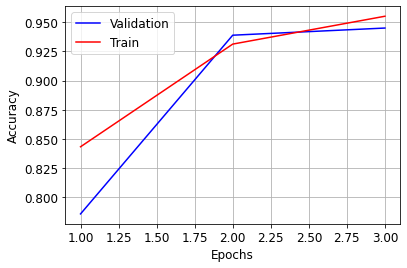

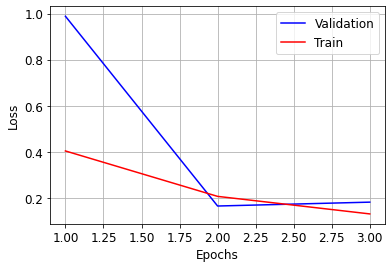

In [11]:
plot_performance(history, 3, 'accuracy')
plot_performance(history, 3, 'loss')